## Preparing the tools

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread

In [2]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

GPU available (YESS!!!!)


## Load Data


In [3]:
!unzip "./dogs_images/dog-breed-identification.zip" -d "data/"

unzip:  cannot find or open ./dogs_images/dog-breed-identification.zip, ./dogs_images/dog-breed-identification.zip.zip or ./dogs_images/dog-breed-identification.zip.ZIP.


In [4]:
labels_csv = pd.read_csv("data/labels.csv")

## Recognize with data

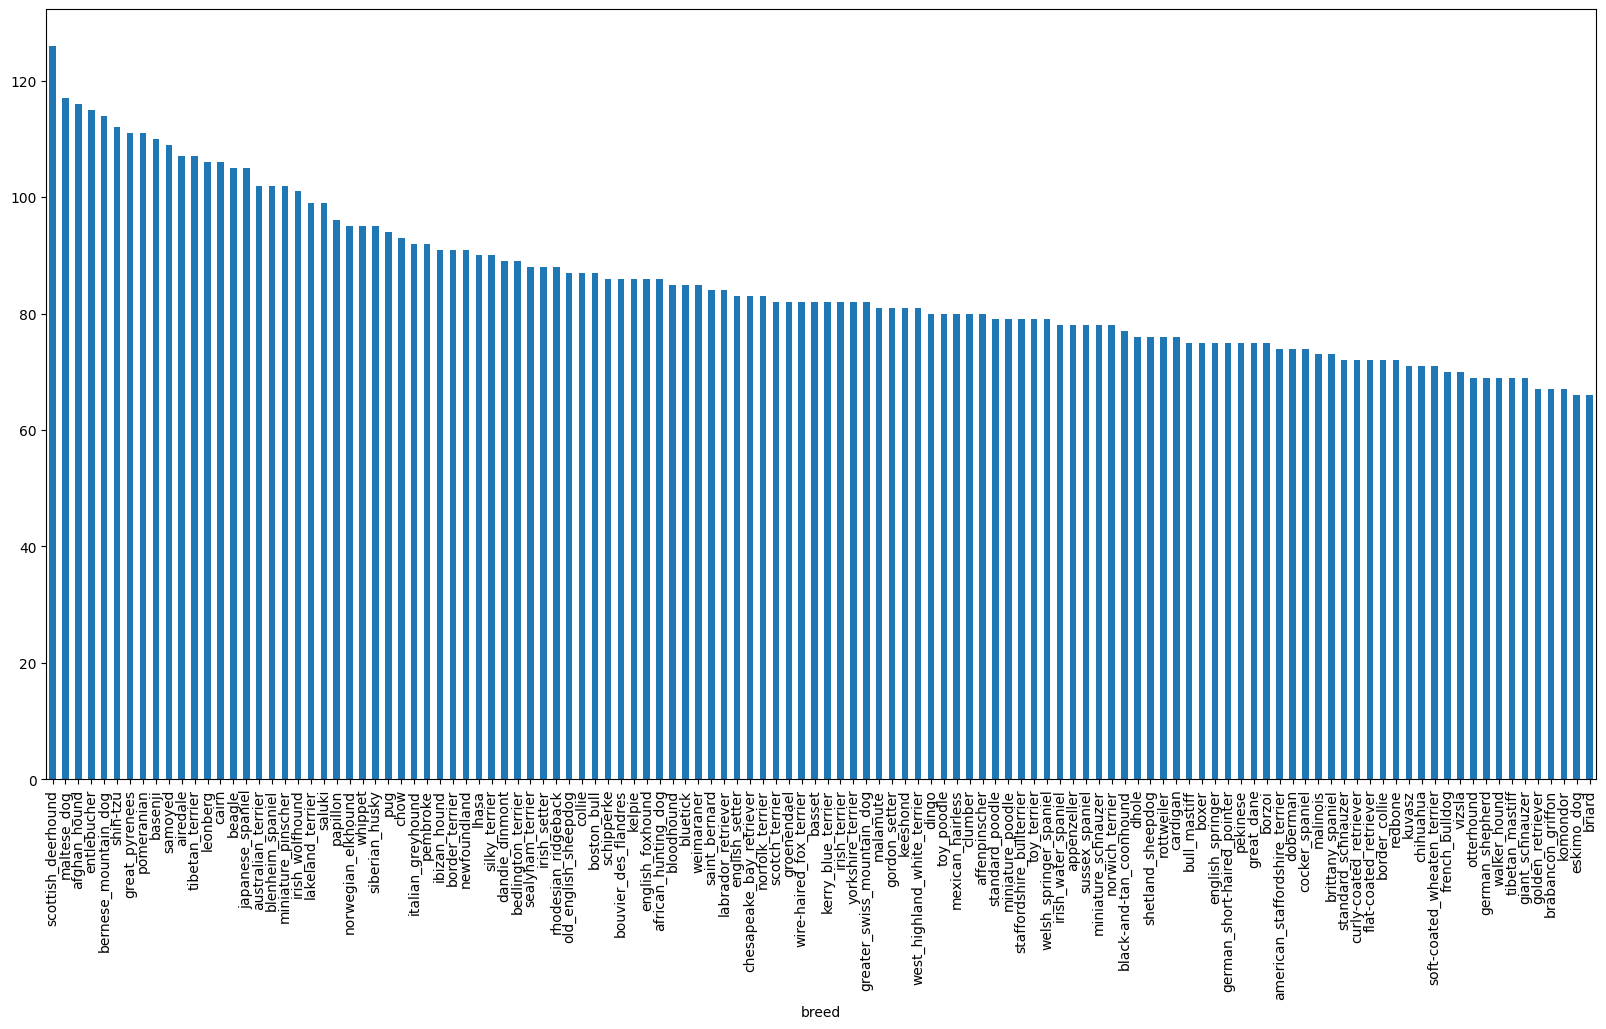

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10)); #check breed of dogs.

In [6]:
#change jpg names to them id
filenames= ["data/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [8]:
unique_breeds = np.unique(labels)
len(unique_breeds) # 120 uniqe breeds of gods

120

In [9]:
#check if labels are correct wirth categories:
boolean_labels = [label == np.array(unique_breeds) for label in labels]

## Modeling

In [10]:
X = filenames #list of names image
y = boolean_labels # index where the dog breed occurs
NUM_IMAGES=1000

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [12]:
#CHECK TRAINING DATA
X_train[:5], y_train[:2]

(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False

In [13]:
image = imread(filenames[42]) # read in an image
image.shape, image

((257, 350, 3),
 array([[[ 89, 137,  89],
         [ 76, 124,  76],
         [ 63, 111,  61],
         ...,
         [ 77, 133,  86],
         [ 76, 134,  86],
         [ 76, 134,  86]],
 
        [[ 72, 119,  75],
         [ 67, 114,  68],
         [ 63, 110,  64],
         ...,
         [ 75, 131,  84],
         [ 74, 132,  84],
         [ 74, 132,  84]],
 
        [[ 56, 104,  66],
         [ 58, 106,  68],
         [ 64, 112,  74],
         ...,
         [ 71, 127,  82],
         [ 73, 129,  84],
         [ 74, 130,  85]],
 
        ...,
 
        [[  2,  11,  10],
         [  5,  14,  11],
         [  8,  14,  14],
         ...,
         [120, 113,  67],
         [126, 118,  71],
         [122, 114,  67]],
 
        [[  0,   3,   7],
         [  2,   7,  10],
         [  3,   9,   7],
         ...,
         [105,  98,  54],
         [112, 104,  58],
         [111, 103,  57]],
 
        [[ 16,  18,  30],
         [ 16,  19,  24],
         [ 15,  20,  14],
         ...,
         [10

In [14]:
tf.constant(image)[:2]


2024-02-28 23:58:03.989053: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-28 23:58:03.989079: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-28 23:58:03.989089: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-28 23:58:03.989186: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-28 23:58:03.989362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [15]:
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [16]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [17]:
BATCH_SIZE = 32 #break the learning process into parts


# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [18]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [19]:
import matplotlib.pyplot as plt
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

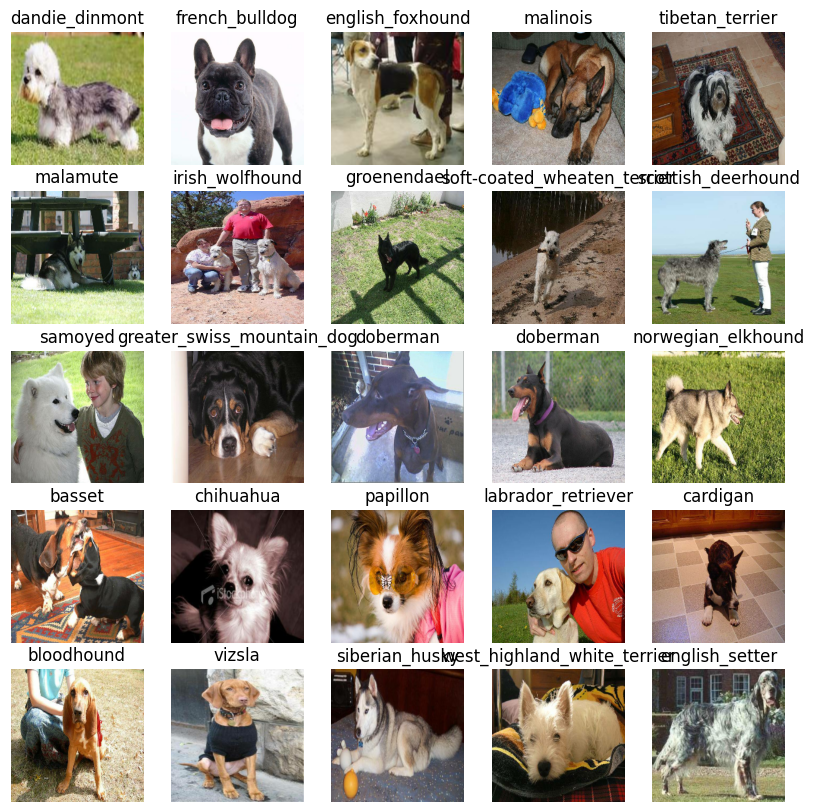

In [20]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

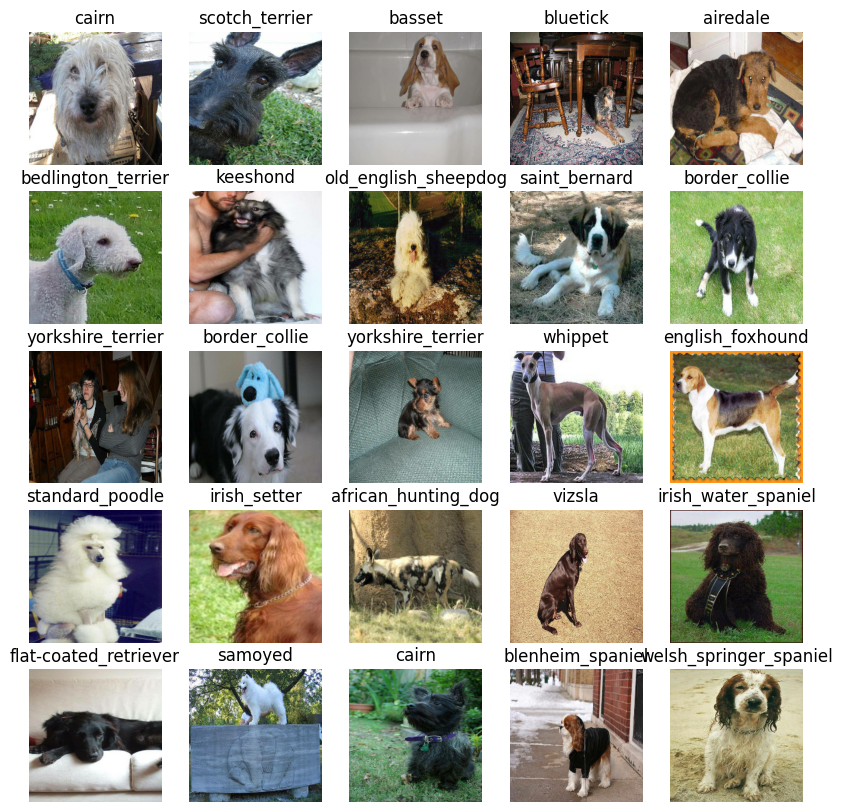

In [21]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [22]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels
# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [23]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), 
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") 
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )

  # Build the model
  model.build(INPUT_SHAPE) 

  return model

In [24]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [25]:
%load_ext tensorboard
import os
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) #

In [26]:
NUM_EPOCHS = 100
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

In [27]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Epoch 1/100


2024-02-28 23:58:13.530586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-28 23:58:13.646681: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


25/25 [==============================] - 11s 279ms/step - loss: 4.5312 - accuracy: 0.1013 - val_loss: 3.3745 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 6s 228ms/step - loss: 1.6189 - accuracy: 0.6938 - val_loss: 2.1473 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 6s 237ms/step - loss: 0.5631 - accuracy: 0.9350 - val_loss: 1.6704 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 6s 226ms/step - loss: 0.2485 - accuracy: 0.9925 - val_loss: 1.4915 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 5s 216ms/step - loss: 0.1432 - accuracy: 0.9987 - val_loss: 1.3844 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 6s 223ms/step - loss: 0.0975 - accuracy: 1.0000 - val_loss: 1.3492 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 6s 221ms/step - loss: 0.0739 - accuracy: 1.0000 - val_loss: 1.3103 - val_accuracy: 0.6700
Epoch 8/10

In [33]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 6s 754ms/step


array([[2.9474963e-03, 4.0866511e-05, 6.9226412e-04, ..., 4.3261473e-04,
        3.2766216e-05, 1.7053949e-02],
       [9.5233571e-04, 3.8187651e-04, 7.8964820e-03, ..., 5.4871594e-04,
        1.9278686e-03, 1.2606932e-04],
       [6.5491877e-05, 3.9969190e-04, 2.2481554e-05, ..., 1.3366791e-04,
        3.3538588e-05, 5.3731870e-04],
       ...,
       [4.1087347e-05, 2.3795720e-04, 2.1200186e-04, ..., 7.9637983e-05,
        3.5961834e-03, 3.2796673e-04],
       [4.3512620e-03, 2.3149952e-04, 7.4929165e-05, ..., 3.1872257e-04,
        9.8750425e-05, 7.0193768e-03],
       [5.6890761e-03, 5.0684391e-04, 2.7314972e-03, ..., 2.1349308e-03,
        3.1072169e-04, 4.8522099e-05]], dtype=float32)

In [34]:
print(predictions[0]) 
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max index: {np.argmax(predictions[0])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")


[2.94749625e-03 4.08665110e-05 6.92264119e-04 5.00228707e-05
 1.48412175e-04 3.15395846e-05 1.11354124e-02 2.11369968e-03
 2.09822407e-04 6.17032056e-04 1.82847594e-04 1.30628614e-04
 2.46385142e-04 9.66157386e-05 3.81250487e-04 2.57220789e-04
 1.03786588e-04 2.15801030e-01 4.55226764e-05 4.94158121e-05
 2.18504481e-03 3.00532647e-05 5.77327301e-05 4.61942662e-04
 2.34610852e-05 1.29511114e-04 4.05552238e-01 4.87170582e-05
 6.33224321e-04 1.65271849e-04 4.18210730e-05 9.37782228e-04
 5.36693726e-04 3.67216999e-05 4.18886164e-04 1.71908922e-02
 6.98473523e-05 1.54762703e-04 1.97340887e-05 9.12551550e-05
 1.28316507e-03 2.52569207e-05 5.51838712e-05 2.44497263e-04
 1.52993289e-05 7.04415070e-05 2.47386160e-05 1.53653702e-04
 2.16953616e-04 1.53606001e-04 2.88497977e-04 1.08337794e-04
 7.54983630e-05 1.55485381e-04 8.55684775e-05 3.53739997e-05
 9.23482366e-06 2.00520363e-03 7.36912363e-04 3.56587805e-02
 5.51644305e-04 5.00669466e-06 6.56048418e-04 4.21693439e-05
 9.96163697e-04 7.457197

In [35]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [36]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [37]:

def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

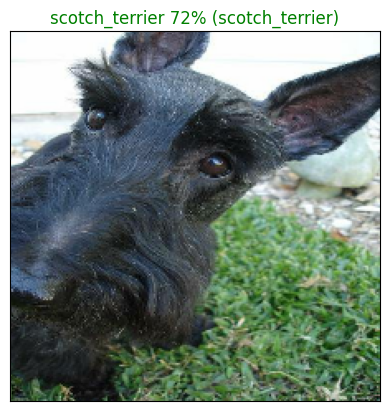

In [38]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [39]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

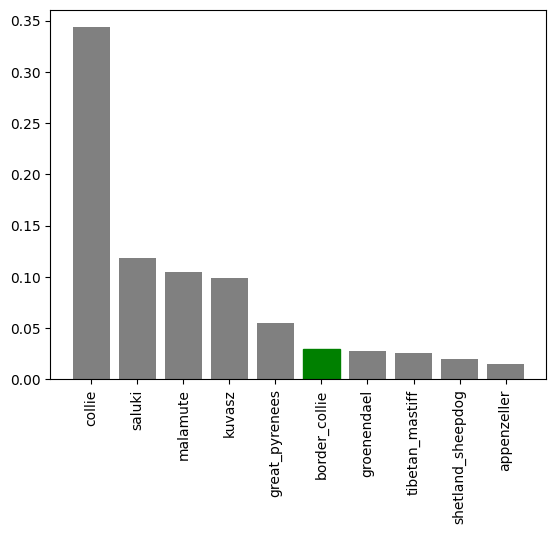

In [40]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

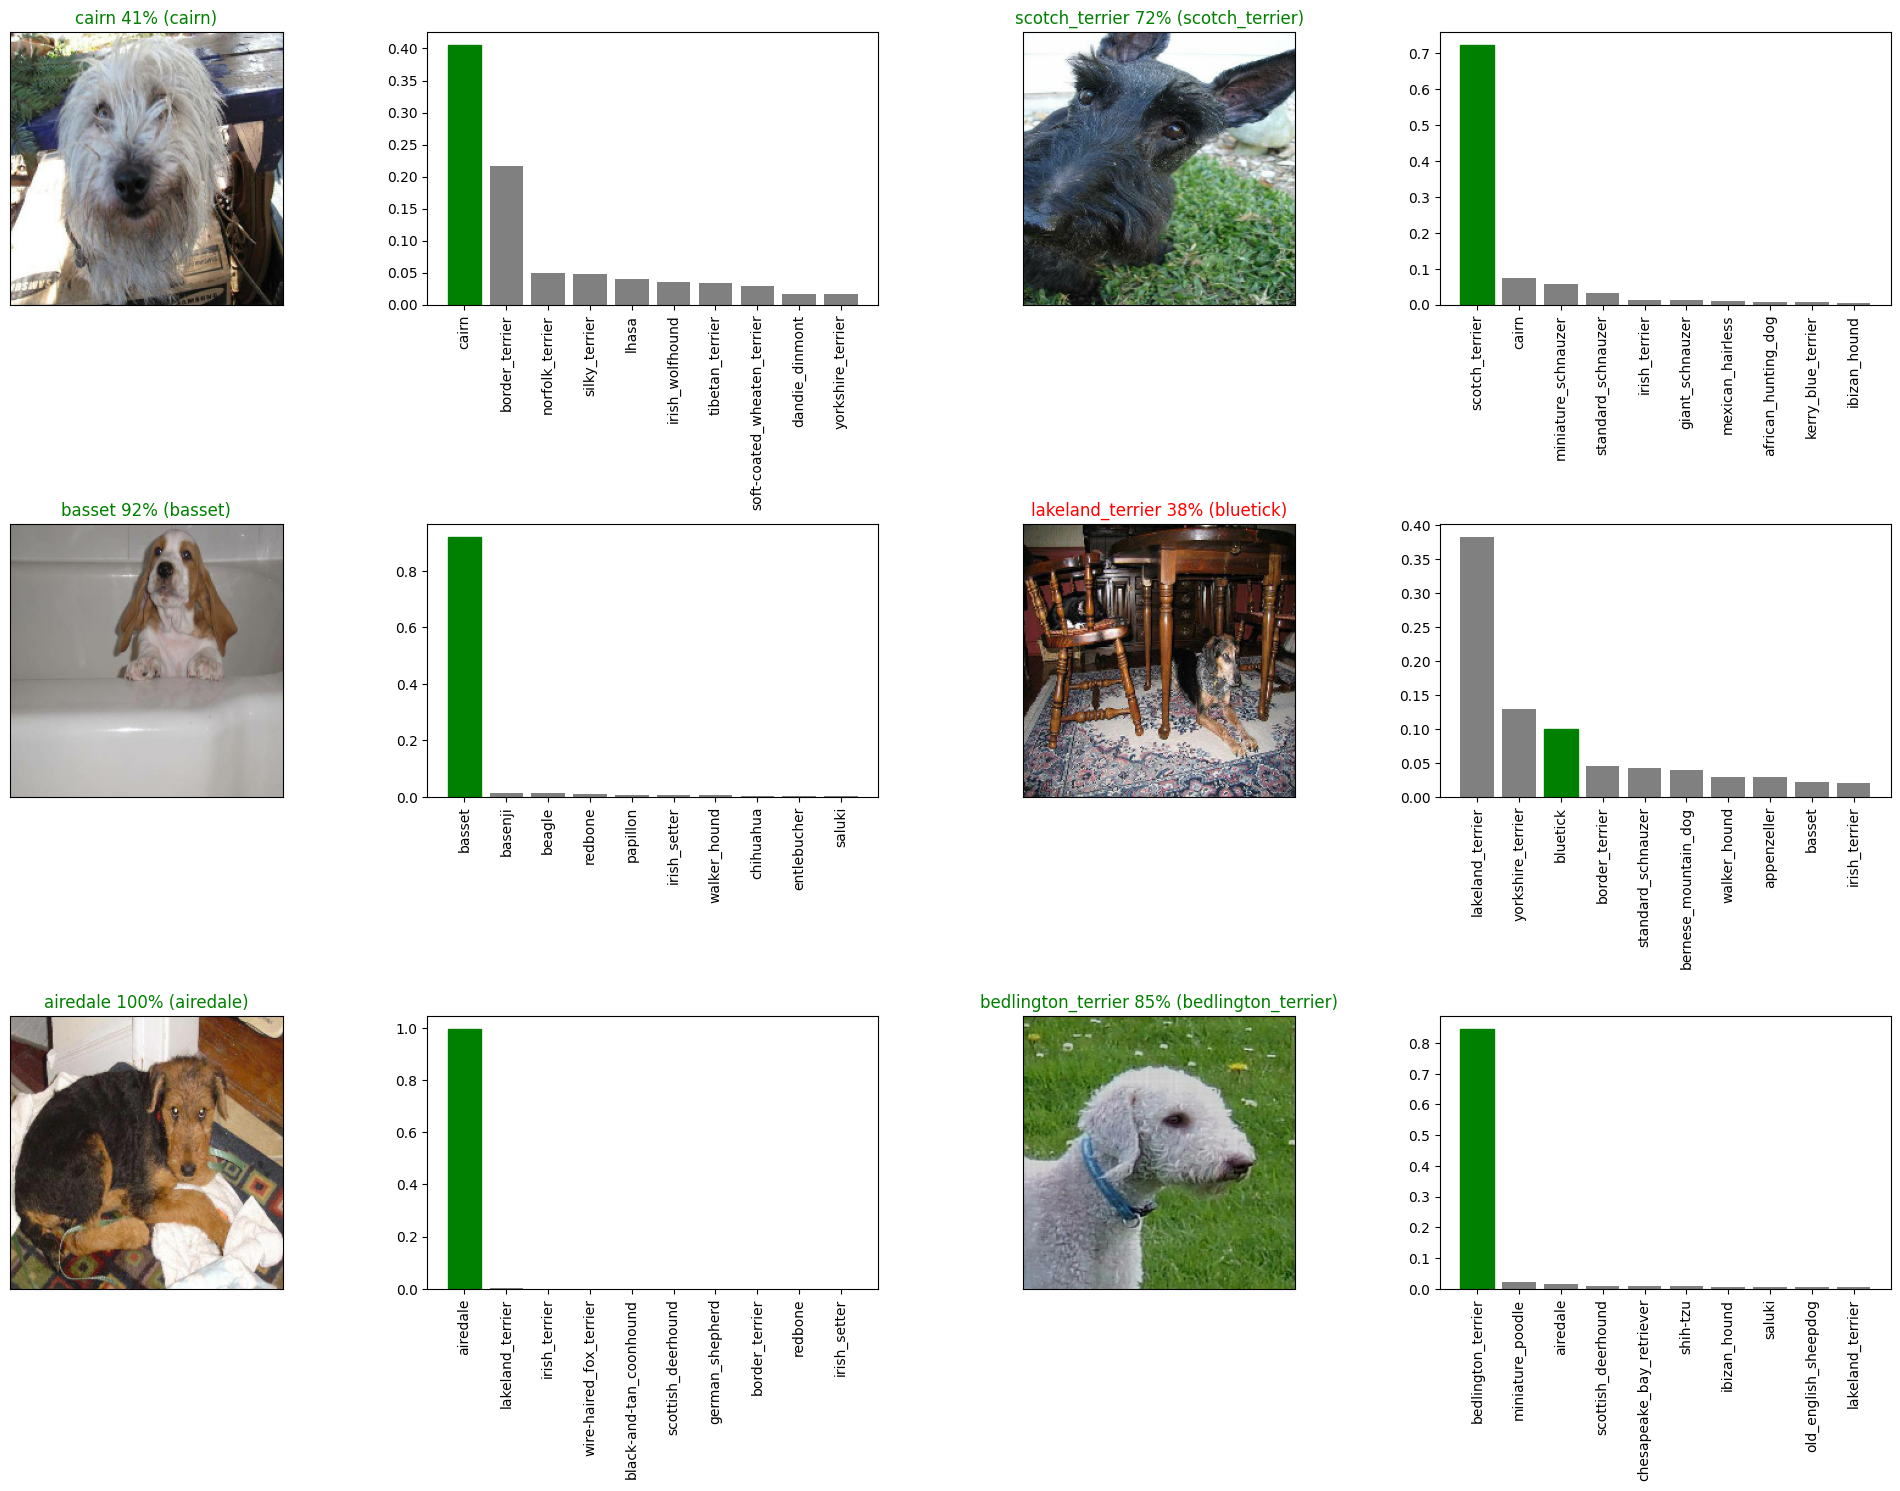

In [41]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [42]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [43]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [44]:
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Data/models/20240229-00091709161776-1000-images-Adam.h5...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Data/models/20240229-00091709161776-1000-images-Adam.h5'

In [51]:
model_1000_images = load_model('drive/My Drive/Data/models/20240229-00091709161776-1000-images-Adam.h5') 

Loading saved model from: drive/My Drive/Data/models/20240229-00091709161776-1000-images-Adam.h5


In [52]:
model_1000_images.evaluate(val_data)

7/7 [==============================] - 5s 210ms/step - loss: 1.2706 - accuracy: 0.6700


[1.2705940008163452, 0.6700000166893005]

In [53]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [54]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [55]:
# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [56]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/100


2024-02-29 00:12:46.059783: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


320/320 [==============================] - 61s 178ms/step - loss: 1.3313 - accuracy: 0.6766
Epoch 2/100
320/320 [==============================] - 62s 192ms/step - loss: 0.4014 - accuracy: 0.8828
Epoch 3/100
320/320 [==============================] - 60s 188ms/step - loss: 0.2341 - accuracy: 0.9371
Epoch 4/100
320/320 [==============================] - 57s 179ms/step - loss: 0.1524 - accuracy: 0.9644
Epoch 5/100
320/320 [==============================] - 58s 181ms/step - loss: 0.1054 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 58s 181ms/step - loss: 0.0776 - accuracy: 0.9866
Epoch 7/100
320/320 [==============================] - 59s 184ms/step - loss: 0.0589 - accuracy: 0.9906
Epoch 8/100
320/320 [==============================] - 59s 185ms/step - loss: 0.0457 - accuracy: 0.9951
Epoch 9/100
320/320 [==============================] - 61s 190ms/step - loss: 0.0380 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 61s 192ms/step - los

In [57]:
#Making predictions on the test dataset
test_path = "data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['data/test/266490a2b053a4a3bf68e779f28fb5a9.jpg',
 'data/test/dae9fd18836d8df20989ef0101771d4b.jpg',
 'data/test/079a40f22b0fad9a66f76797b62bb930.jpg',
 'data/test/ab8462f9a501d362041d47582fddc9ad.jpg',
 'data/test/8895089b432e020cc42e6262b5a1c2dd.jpg',
 'data/test/985ae7fc271ac4a0d131e546c0f95bb6.jpg',
 'data/test/77c1ab99cffb817d54fb14f229aeb118.jpg',
 'data/test/ad7e50abca9b7c6a88b63946c5bbe493.jpg',
 'data/test/d61a09cecf56666cdb315ebce4b93c43.jpg',
 'data/test/cb120c57904e8c0694bbe259c58a873c.jpg']

In [58]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [59]:
test_predictions = full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 56s 169ms/step


In [60]:
test_predictions[:10]

array([[1.1594242e-10, 1.3778081e-06, 1.7130318e-09, ..., 2.1986402e-06,
        2.1362569e-10, 6.2314607e-12],
       [1.1124929e-02, 8.6115679e-04, 6.6062703e-06, ..., 8.7500503e-06,
        3.9233367e-07, 5.6046581e-08],
       [4.8520704e-08, 1.0811522e-10, 5.0062602e-13, ..., 3.6996265e-12,
        2.8738694e-11, 4.0904975e-13],
       ...,
       [1.2171848e-11, 1.8768453e-08, 3.8878309e-10, ..., 7.1358255e-07,
        1.4310281e-10, 3.5367632e-11],
       [1.1912726e-07, 2.2356577e-04, 2.9840208e-10, ..., 1.4558615e-09,
        1.3776257e-12, 8.2818902e-10],
       [5.5289487e-08, 7.6848938e-10, 1.2350425e-09, ..., 4.0737150e-11,
        9.1597291e-10, 1.7059736e-05]], dtype=float32)

In [61]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [62]:
# Append test image ID's to predictions DataFrame
test_path = "data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  266490a2b053a4a3bf68e779f28fb5a9           NaN          NaN   
1  dae9fd18836d8df20989ef0101771d4b           NaN          NaN   
2  079a40f22b0fad9a66f76797b62bb930           NaN          NaN   
3  ab8462f9a501d362041d47582fddc9ad           NaN          NaN   
4  8895089b432e020cc42e6262b5a1c2dd           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [63]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  266490a2b053a4a3bf68e779f28fb5a9   1.159424e-10  1.377808e-06   
1  dae9fd18836d8df20989ef0101771d4b   1.112493e-02  8.611568e-04   
2  079a40f22b0fad9a66f76797b62bb930   4.852070e-08  1.081152e-10   
3  ab8462f9a501d362041d47582fddc9ad   8.121533e-11  4.349909e-09   
4  8895089b432e020cc42e6262b5a1c2dd   2.347590e-11  2.997367e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.713032e-09  6.836015e-08                    3.697699e-12   
1         6.606270e-06  1.473862e-07                    1.221329e-07   
2         5.006260e-13  9.936721e-11                    3.079221e-11   
3         3.406439e-12  6.990104e-09                    4.233225e-12   
4         2.891219e-09  2.115130e-11                    9.314345e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.726147e-06        2.030814e-13  2.147859e-11  1.913580e-04  ...   
1  2.203297e-08        5.774403e-04  2.899571e-09  8.208598e-08  ...   
2  9.235806e-12        1.503176e-11  9.656728e-12  1.957898e-12  ...   
3  5.868367e-09        5.995348e-10  6.132951e-13  2.733777e-11  ...   
4  1.615489e-09        2.049744e-07  1.646686e-04  2.561004e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.072363e-10  5.575133e-10  5.650349e-06  3.899707e-07  4.749844e-07   
1  4.895029e-08  4.291296e-07  7.051961e-08  1.163688e-05  1.787770e-05   
2  2.092309e-12  6.617875e-13  2.052271e-12  6.341114e-11  6.011438e-11   
3  1.634343e-09  1.401745e-10  1.073565e-10  4.828006e-09  2.516212e-11   
4  7.103708e-10  2.689030e-08  6.619743e-10  1.808856e-11  8.941588e-11   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.155182e-13                 1.181711e-09  2.198640e-06   
1            4.011883e-12                 1.343423e-06  8.750050e-06   
2            4.163584e-13                 3.239049e-13  3.699627e-12   
3            5.548626e-08                 3.452618e-10  3.093441e-11   
4            3.390685e-08                 1.099405e-08  4.274325e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.136257e-10       6.231461e-12  
1             3.923337e-07       5.604658e-08  
2             2.873869e-11       4.090497e-13  
3             2.271277e-13       1.571221e-07  
4             3.239105e-09       1.244168e-11  

[5 rows x 121 columns]